# Project Intro

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses.

In [1]:
import pandas as pd

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

star_wars.head(10)


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

# Cleaning the Data

In [2]:
# Remove any rows where RespondentID is NaN

star_wars = star_wars[star_wars["RespondentID"].notnull()]

star_wars.shape

(1186, 38)

In [3]:
# Convert the Have you seen any of the 6 films in the Star Wars franchise? column to the Boolean type.
import numpy as np

yes_no = { "Yes": True, "No": False}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].head()


1     True
2    False
3     True
4     True
5     True
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: bool

The next six columns represent a single checkbox question.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie.

Convert each of these columns to a Boolean, then rename the column something more intuitive.


In [4]:
star_wars.rename(columns = {"Which of the following Star Wars films have you seen? Please select all that apply." : "seen_1", 
                            "Unnamed: 4":"seen_2", "Unnamed: 5":"seen_3",
                            "Unnamed: 6": "seen_4", "Unnamed: 7":"seen_5", 
                            "Unnamed: 8":"seen_6"}, inplace = True)


In [5]:
col_list = ["seen_1", "seen_2", "seen_3",
           "seen_4", "seen_5", "seen_6"]

for col in col_list:
    star_wars[col].mask(star_wars[col].notnull(),True, inplace = True)
    star_wars[col].mask(star_wars[col].isnull(),False, inplace = True)
        
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,False,True,False,False,False,False,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


In [6]:
# Cleaning the ratings columns

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)


In [7]:
star_wars.rename(columns = {"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film." : "rating_1",
                            "Unnamed: 10" : "rating_2", "Unnamed: 11" : "rating_3",
                            "Unnamed: 12" : "rating_4", "Unnamed: 13" : "rating_5",
                            "Unnamed: 14" : "rating_6"}, inplace = True)
                            
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rating_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,False,True,False,False,False,False,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


# Comparing rankings by movie

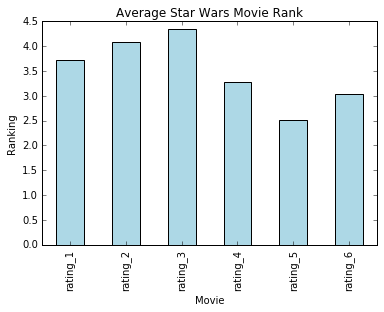

In [8]:
avg_rank = star_wars.iloc[:,9:15].mean()

%matplotlib inline

rank = avg_rank.plot(kind = "bar", title = "Average Star Wars Movie Rank", color = "Lightblue")

rank.set_xlabel("Movie")
rank.set_ylabel("Ranking")


### Lower rank is better!

# Finding the Most Viewed Movie

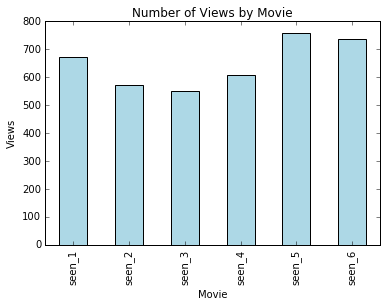

In [9]:
# Find the total number of 'True' values in each seen column

tot_seen = star_wars.iloc[:, 3:9].sum()

watched = tot_seen.plot.bar(title = "Number of Views by Movie", color = "Lightblue")

watched.set_xlabel("Movie")
watched.set_ylabel("Views")


Apart from the first movie, if we compare average ranking with total views, higher ranking (lower number) corresponds to more views.

# Exploring the data by gender segments

In [10]:
# Split the dataframe into two groups by gender.

males = star_wars[star_wars["Gender"] == "Male"]

females = star_wars[star_wars["Gender"] == "Female"]


In [11]:
# Rankings by movie by gender

avg_rank_male = males.iloc[:, 9:15].mean()
avg_rank_female = females.iloc[:, 9:15].mean()


(0, 5)

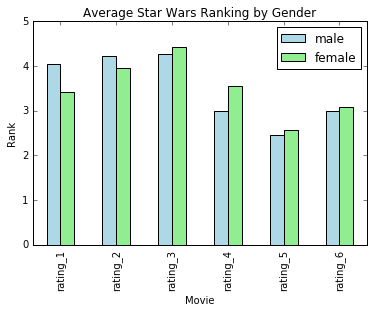

In [12]:
rank_gender = pd.DataFrame(avg_rank_male)

rank_gender["female"] = pd.DataFrame(avg_rank_female)

rank_gender.rename(columns = {0: "male"}, inplace = True)

rank_gender_graph = rank_gender.plot.bar(color = ("Lightblue", "Lightgreen"),
                    title = "Average Star Wars Ranking by Gender")

rank_gender_graph.set_xlabel("Movie")
rank_gender_graph.set_ylabel("Rank")
rank_gender_graph.set_ylim(0, 5)



- Movie 5 received the best ranking for both genders. <br>
- Movie 3 received the lowest ranking for both genders. <br>
- Only disparity in ranking is for Movies 1 and 4.

In [13]:
# Most viewed Star Wars movie by gender

tot_watch_male = males.iloc[:, 3:9].sum()
tot_watch_female = females.iloc[:, 3:9].sum()


(0, 550)

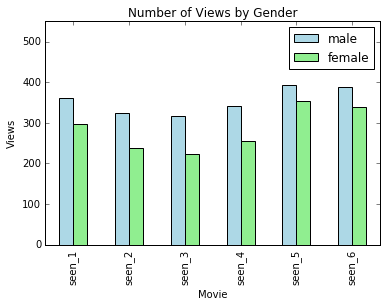

In [14]:
watch_gender = pd.DataFrame(tot_watch_male)

watch_gender["female"] = pd.DataFrame(tot_watch_female)

watch_gender.rename(columns = {0: "male"}, inplace = True)

watch_gender_graph = watch_gender.plot.bar(color = ("Lightblue", "Lightgreen"),
                    title = "Number of Views by Gender")

watch_gender_graph.set_xlabel("Movie")
watch_gender_graph.set_ylabel("Views")
watch_gender_graph.set_ylim(0, 550)


There are more men than women who have watched every single Star Wars movie.

In [30]:
# Number of Star Wars fans by gender

war_fan_male = males.iloc[:, 2].sum()
war_fan_female = females.iloc[:, 2].sum()

print("Male Star Wars Fans:", war_fan_male)
print("Female Star Wars Fans:", war_fan_female)

Male Star Wars Fans: 303
Female Star Wars Fans: 238


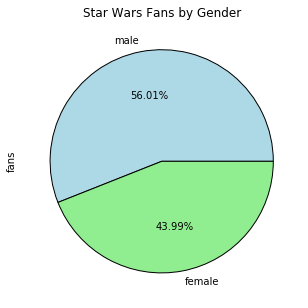

In [43]:
war_fan = pd.DataFrame({'fans': [303, 238]}, 
                       index= ["male", "female"])

war_fan_graph = war_fan.plot.pie(y = 'fans', autopct = "%.2f%%",
                                 figsize = (5,5), legend = False,
                                 colors = ["Lightblue", "Lightgreen"],
                                title = "Star Wars Fans by Gender")



In [31]:
# Number of Star Trek fans by gender

male = males.copy()
female = females.copy()

male.iloc[:, -6] = male.iloc[:, -6].map({"No": False, "Yes": True})
female.iloc[:, -6] = female.iloc[:, -6].map({"No": False, "Yes": True})

trek_fan_male = male.iloc[:, -6].sum()
trek_fan_female = female.iloc[:, -6].sum()

print("Male Star Trek Fans:", trek_fan_male)
print("Female Star Trek Fans:", trek_fan_female)

Male Star Trek Fans: 236
Female Star Trek Fans: 187


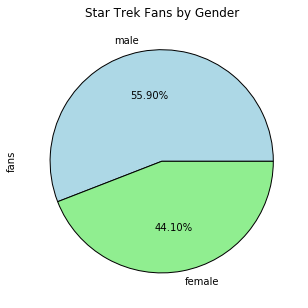

In [44]:
trek_fan = pd.DataFrame({'fans': [237, 187]}, 
                       index= ["male", "female"])

trek_fan_graph = trek_fan.plot.pie(y = 'fans', autopct = "%.2f%%",
                                   figsize = (5,5), legend = False,
                                   colors = ["Lightblue", "Lightgreen"],
                                   title = "Star Trek Fans by Gender")



### There are more male fans for both the Star Wars and Star Trek franchise.